<a href="https://colab.research.google.com/github/Alan-Bravo-Tec/Data-Mining-Python/blob/main/20261_1910_O6_ReglasAsociasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Asociacion
import pandas as pd
#from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
# Leer datos desde un archivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/omarmendoza564/datos/refs/heads/main/datos/transactions.csv', header=None)
df

,0,1,2,3,4,5,6
0,Pan,Leche,Mantequilla,Vino,Aceite,NaN,NaN
1,Pan,Pañal,Cerveza,Huevos,NaN,NaN,NaN
2,Pan,Pañal,Cerveza,Huevos,NaN,NaN,NaN
3,Leche,Pañal,Cerveza,Coca-Cola,NaN,NaN,NaN
4,Pan,Leche,Pañal,Coca-Cola,Vino,Aceite,Mantequilla
...,...,...,...,...,...,...,...
95,Pan,Leche,Pañal,Coca-Cola,Vino,Aceite,Mantequilla
96,Leche,Pañal,Cerveza,Coca-Cola,Aceite,NaN,NaN
97,Leche,Pañal,Cerveza,Coca-Cola,Vino,Aceite,Mantequilla
98,Pan,Leche,Pañal,Coca-Cola,Mantequilla,NaN,NaN


In [ ]:
#generar una lista de elementos para el algoritmo apriori
transactions = df.map(str).values.tolist()
transactions = [[i for i in t if i != 'nan'] for t in transactions]
transactions

[['Pan', 'Leche', 'Mantequilla', 'Vino', 'Aceite'],
 ['Pan', 'Pañal', 'Cerveza', 'Huevos'],
 ['Pan', 'Pañal', 'Cerveza', 'Huevos'],
 ['Leche', 'Pañal', 'Cerveza', 'Coca-Cola'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola', 'Vino', 'Aceite', 'Mantequilla'],
 ['Pan', 'Leche', 'Pañal', 'Cerveza', 'Vino'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola'],
 ['Pan', 'Pañal', 'Cerveza', 'Huevos'],
 ['Leche', 'Pañal', 'Cerveza', 'Coca-Cola', 'Mantequilla'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola'],
 ['Leche', 'Pañal', 'Cerveza', 'Coca-Cola'],
 ['Pan', 'Leche', 'Pañal', 'Cerveza'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola', 'Mantequilla'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola', 'Aceite', 'Mantequilla'],
 ['Pan', 'Leche', 'Pañal', 'Cerveza', 'Vino'],
 ['Leche', 'Pañal', 'Cerveza', 'Coca-Cola', 'Mantequilla', 'Vino', 'Aceite'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola', 'Mantequilla'],
 ['Pan', 'Pañal', 'Cerveza', 'Huevos'],
 ['Pan', 'L

In [ ]:
from collections import Counter

items = Counter()

for transaction in transactions:
    items.update(Counter(transaction))

items_df = pd.DataFrame(items.items(), columns=['Item', 'Frecuencia'])\
    .sort_values(by='Frecuencia', ascending=False)

items_df

,Item,Frecuencia
5,Pañal,85
1,Leche,84
0,Pan,75
6,Cerveza,58
8,Coca-Cola,52
2,Mantequilla,50
3,Vino,43
4,Aceite,42
7,Huevos,16


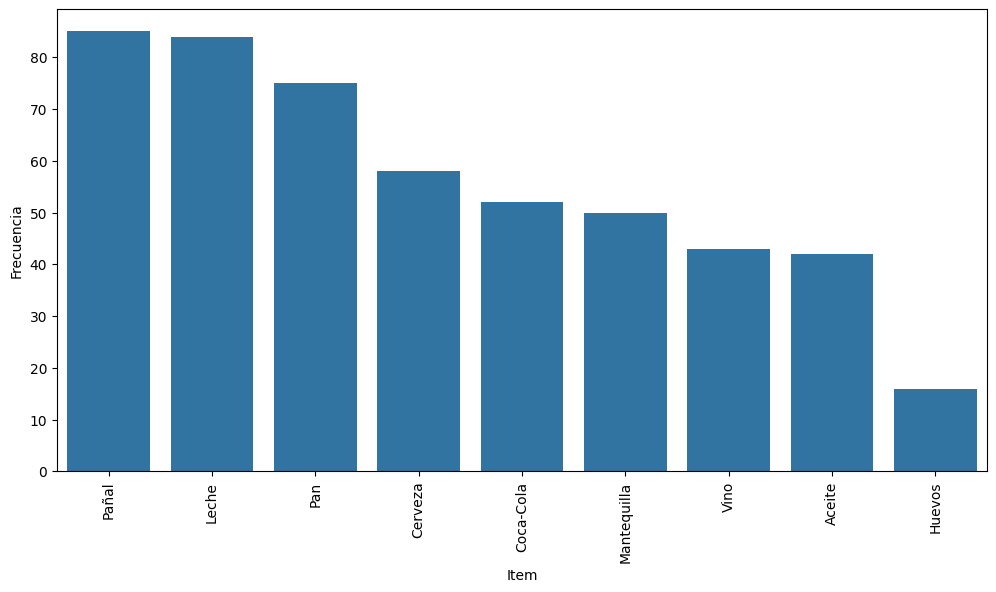

In [ ]:
#graficar la frecuencia de los items
#Graficar la frecuencia de los items

plt.figure(figsize=(12,6))

sns.barplot(x='Item', y='Frecuencia', data=items_df)

plt.xticks(rotation=90)

plt.show()

In [ ]:
#Distribucion de no. de items por transaccion

item_counts = pd.Series([len(transaction) for transaction in transactions])

item_counts.describe(percentiles=[0.05, 0.25, 0.50,.75,.95])

,0
count,100.00000
mean,5.05000
std,1.37345
min,2.00000
5%,3.00000
25%,4.00000
50%,5.00000
75%,6.00000
95%,7.00000
max,7.00000


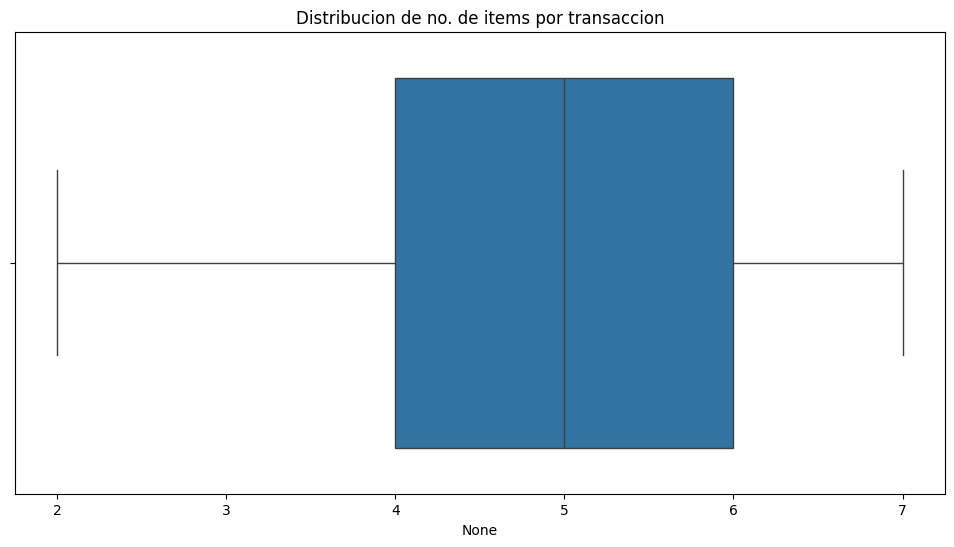

In [ ]:
#Boxplot de la distribución de ítems
plt.figure(figsize=(12, 6))

sns.boxplot(x=item_counts)

plt.title('Distribucion de no. de items por transaccion')

plt.show()

In [ ]:
#Matriz binaria (encoder)
#Crear la matriz binaria (encoder)

encoder = TransactionEncoder().fit(transactions)

onehot = pd.DataFrame(encoder.transform(transactions), columns=encoder.columns_)

onehot

,Aceite,Cerveza,Coca-Cola,Huevos,Leche,Mantequilla,Pan,Pañal,Vino
0,True,False,False,False,True,True,True,False,True
1,False,True,False,True,False,False,True,True,False
2,False,True,False,True,False,False,True,True,False
3,False,True,True,False,True,False,False,True,False
4,True,False,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
95,True,False,True,False,True,True,True,True,True
96,True,True,True,False,True,False,False,True,False
97,True,True,True,False,True,True,False,True,True
98,False,False,True,False,True,True,True,True,False


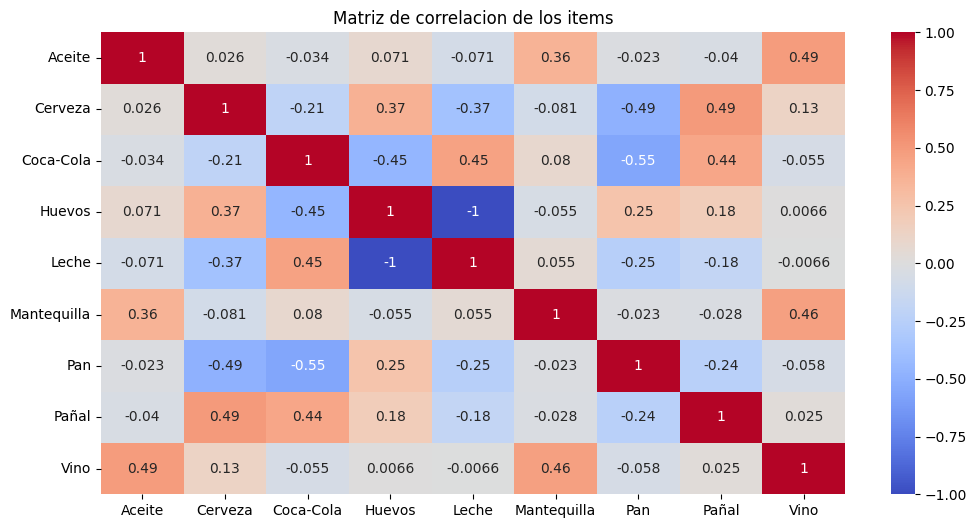

In [ ]:
#Matriz de correlacion de los items

plt.figure(figsize=(12, 6))

sns.heatmap(onehot.corr(), annot=True, cmap='coolwarm')

plt.title('Matriz de correlacion de los items')

plt.show()

In [ ]:
#Porcentaje de transacciones en las que aparece cada producto
onehot.mean(axis = 0).sort_values(ascending = False)

,0
Pañal,0.85
Leche,0.84
Pan,0.75
Cerveza,0.58
Coca-Cola,0.52
Mantequilla,0.50
Vino,0.43
Aceite,0.42
Huevos,0.16


In [ ]:
soporte = 0.30
print(f'el soporte minimo es de {soporte * 100}')
itemsets = apriori(onehot, min_support=soporte, use_colnames=True)
print(f'numero de itemsets: {itemsets.shape[0]}')
itemsets.sort_values(by='support', ascending=False)

el soporte minimo es de 30.0
numero de itemsets: 35


,support,itemsets
6,0.85,(Pañal)
3,0.84,(Leche)
5,0.75,(Pan)
20,0.69,"(Leche, Pañal)"
25,0.60,"(Pan, Pañal)"
19,0.59,"(Leche, Pan)"
1,0.58,(Cerveza)
15,0.58,"(Pañal, Cerveza)"
2,0.52,(Coca-Cola)
30,0.52,"(Leche, Coca-Cola, Pañal)"


In [ ]:
#mostrar los 10 itemsets con mayor soporte

itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
6,0.85,(Pañal)
3,0.84,(Leche)
5,0.75,(Pan)
20,0.69,"(Leche, Pañal)"
25,0.60,"(Pan, Pañal)"
19,0.59,"(Leche, Pan)"
1,0.58,(Cerveza)
15,0.58,"(Pañal, Cerveza)"
2,0.52,(Coca-Cola)
30,0.52,"(Leche, Coca-Cola, Pañal)"


In [ ]:
#Top 10 itemsets con almenos dos elementos
itemsets[itemsets['itemsets'].apply(lambda x: len(x) >=2)].sort_values(by='support', ascending = False).head(10)

,support,itemsets
20,0.69,"(Leche, Pañal)"
25,0.60,"(Pan, Pañal)"
19,0.59,"(Leche, Pan)"
15,0.58,"(Pañal, Cerveza)"
30,0.52,"(Leche, Coca-Cola, Pañal)"
16,0.52,"(Leche, Coca-Cola)"
17,0.52,"(Coca-Cola, Pañal)"
33,0.44,"(Leche, Pan, Pañal)"
18,0.43,"(Leche, Mantequilla)"
28,0.42,"(Leche, Pañal, Cerveza)"


In [ ]:
ibuscado = 'Vino'

itemsets[itemsets['itemsets'].apply(lambda x: ibuscado in list(x))].sort_values(by='support', ascending=False)

,support,itemsets
7,0.43,(Vino)
27,0.37,"(Vino, Pañal)"
21,0.36,"(Leche, Vino)"
24,0.33,"(Mantequilla, Vino)"
26,0.31,"(Vino, Pan)"
12,0.30,"(Vino, Aceite)"
34,0.30,"(Leche, Vino, Pañal)"


In [ ]:
#Buscar itemsets que contengan dos items, mantequilla y pa;ales

ibu = {'Vino', 'Pañal'}
itemsets[itemsets['itemsets'].apply(lambda x: x.issuperset(ibu))].sort_values(by='support', ascending = False)

,support,itemsets
27,0.37,"(Vino, Pañal)"
34,0.30,"(Leche, Vino, Pañal)"


In [ ]:
confianza = 0.7
reglas = association_rules(itemsets, metric = 'confidence', min_threshold = confianza)
print(f'Numero de reglas: {reglas.shape[0]}')
reglas.sort_values(by='confidence', ascending = False)

Numero de reglas: 38


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
28,"(Coca-Cola, Pañal)",(Leche),0.52,0.84,0.52,1.000000,1.190476,1.0,0.0832,inf,0.333333,0.619048,1.000000,0.809524
26,"(Leche, Coca-Cola)",(Pañal),0.52,0.85,0.52,1.000000,1.176471,1.0,0.0780,inf,0.312500,0.611765,1.000000,0.805882
29,(Coca-Cola),"(Leche, Pañal)",0.52,0.69,0.52,1.000000,1.449275,1.0,0.1612,inf,0.645833,0.753623,1.000000,0.876812
8,(Coca-Cola),(Pañal),0.52,0.85,0.52,1.000000,1.176471,1.0,0.0780,inf,0.312500,0.611765,1.000000,0.805882
7,(Coca-Cola),(Leche),0.52,0.84,0.52,1.000000,1.190476,1.0,0.0832,inf,0.333333,0.619048,1.000000,0.809524
6,(Cerveza),(Pañal),0.58,0.85,0.58,1.000000,1.176471,1.0,0.0870,inf,0.357143,0.682353,1.000000,0.841176
25,"(Pan, Cerveza)",(Pañal),0.33,0.85,0.33,1.000000,1.176471,1.0,0.0495,inf,0.223881,0.388235,1.000000,0.694118
22,"(Leche, Cerveza)",(Pañal),0.42,0.85,0.42,1.000000,1.176471,1.0,0.0630,inf,0.258621,0.494118,1.000000,0.747059
21,(Vino),(Pañal),0.43,0.85,0.37,0.860465,1.012312,1.0,0.0045,1.075000,0.021337,0.406593,0.069767,0.647880
9,(Mantequilla),(Leche),0.50,0.84,0.43,0.860000,1.023810,1.0,0.0100,1.142857,0.046512,0.472527,0.125000,0.685952


In [ ]:

#Buscar reglas que puedan ser causadas al azar
confianza = 0.01
reglas_azar = association_rules(itemsets, metric = 'confidence', min_threshold = confianza)
print(f'Numero de reglas: {reglas_azar.shape[0]}')
reglas_azar.sort_values(by='lift', ascending = True)

Numero de reglas: 82


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
12,(Pan),(Cerveza),0.75,0.58,0.33,0.440000,0.758621,1.0,-0.1050,0.750000,-0.560000,0.330000,-0.333333,0.504483
13,(Cerveza),(Pan),0.58,0.75,0.33,0.568966,0.758621,1.0,-0.1050,0.580000,-0.431034,0.330000,-0.724138,0.504483
50,(Pan),"(Cerveza, Pañal)",0.75,0.58,0.33,0.440000,0.758621,1.0,-0.1050,0.750000,-0.560000,0.330000,-0.333333,0.504483
47,"(Cerveza, Pañal)",(Pan),0.58,0.75,0.33,0.568966,0.758621,1.0,-0.1050,0.580000,-0.431034,0.330000,-0.724138,0.504483
74,(Pan),"(Leche, Pañal)",0.75,0.69,0.44,0.586667,0.850242,1.0,-0.0775,0.750000,-0.413333,0.440000,-0.333333,0.612174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,"(Leche, Pañal)",(Coca-Cola),0.69,0.52,0.52,0.753623,1.449275,1.0,0.1612,1.948235,1.000000,0.753623,0.486715,0.876812
33,(Vino),(Mantequilla),0.43,0.50,0.33,0.767442,1.534884,1.0,0.1150,2.150000,0.611377,0.550000,0.534884,0.713721
32,(Mantequilla),(Vino),0.50,0.43,0.33,0.660000,1.534884,1.0,0.1150,1.676471,0.696970,0.550000,0.403509,0.713721
9,(Aceite),(Vino),0.42,0.43,0.30,0.714286,1.661130,1.0,0.1194,1.995000,0.686207,0.545455,0.498747,0.705980


In [ ]:
#Mostrar las reglas que tengan como antecedente mantequilla
ibuscado = 'Mantequilla'
reglas[reglas['antecedents'].apply(lambda x: ibuscado in list(x))].sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
9,(Mantequilla),(Leche),0.50,0.84,0.43,0.860000,1.023810,1.0,0.0100,1.142857,0.046512,0.472527,0.125000,0.685952
16,(Mantequilla),(Pañal),0.50,0.85,0.42,0.840000,0.988235,1.0,-0.0050,0.937500,-0.023256,0.451613,-0.066667,0.667059
32,"(Mantequilla, Pañal)",(Leche),0.42,0.84,0.35,0.833333,0.992063,1.0,-0.0028,0.960000,-0.013605,0.384615,-0.041667,0.625000
31,"(Leche, Mantequilla)",(Pañal),0.43,0.85,0.35,0.813953,0.957592,1.0,-0.0155,0.806250,-0.072093,0.376344,-0.240310,0.612859
30,"(Mantequilla, Pan)",(Leche),0.37,0.84,0.30,0.810811,0.965251,1.0,-0.0108,0.845714,-0.054054,0.329670,-0.182432,0.583977
15,(Mantequilla),(Pan),0.50,0.75,0.37,0.740000,0.986667,1.0,-0.0050,0.961538,-0.026316,0.420455,-0.040000,0.616667
33,(Mantequilla),"(Leche, Pañal)",0.50,0.69,0.35,0.700000,1.014493,1.0,0.0050,1.033333,0.028571,0.416667,0.032258,0.603623


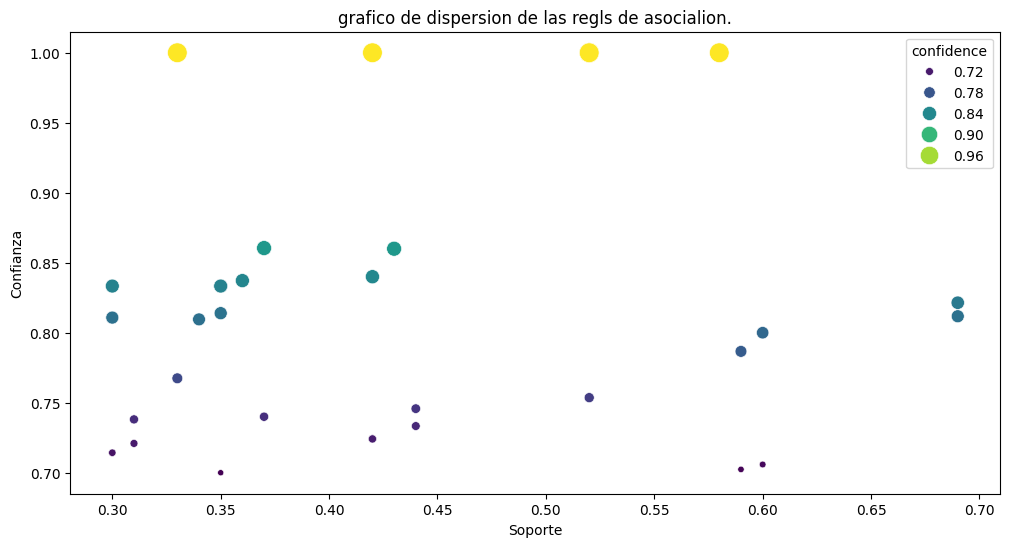

In [ ]:
#Grafico de dispersión de las reglas de asociación

plt.figure(figsize = (12,6))
sns.scatterplot(x= 'support', y='confidence', data = reglas, hue = 'confidence', size = 'confidence', sizes = (20,200), palette = 'viridis')

plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title("grafico de dispersion de las regls de asocialion.")
plt.show()

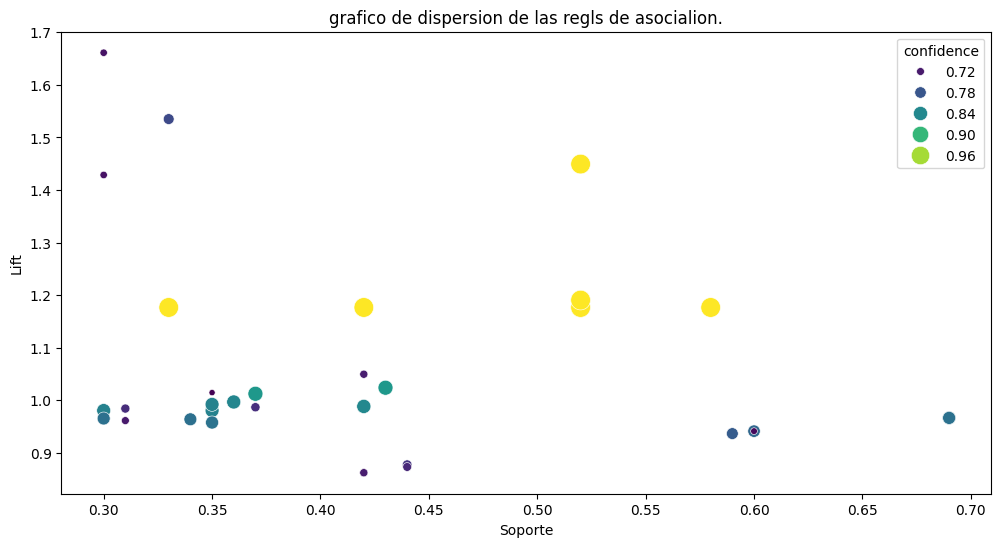

In [ ]:
#Grafico de dispersión de las reglas de asociación

plt.figure(figsize = (12,6))
sns.scatterplot(x= 'support', y='lift', data = reglas, hue = 'confidence', size = 'confidence', sizes = (20,200), palette = 'viridis')

plt.xlabel('Soporte')
plt.ylabel('Lift')
plt.title("grafico de dispersion de las regls de asocialion.")
plt.show()

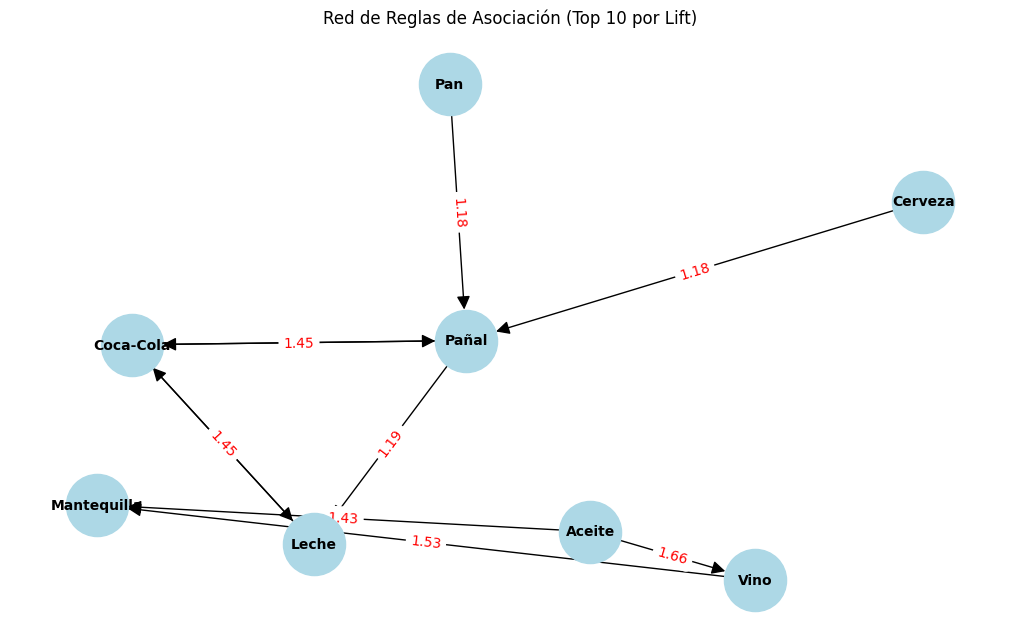

In [ ]:
import networkx as nx
varista='lift'
# Crear el grafo
G = nx.DiGraph()

# Agregar nodos y aristas de las reglas top N
top_rules = reglas.sort_values(by=varista, ascending=False).head(10)
for _, row in top_rules.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row[varista])

# Dibujar el grafo
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()}, font_color='red')
plt.title("Red de Reglas de Asociación (Top 10 por Lift)")
plt.show()

/tmp/ipython-input-2474876853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_rules['antecedent'] = pair_rules['antecedents'].apply(lambda x: next(iter(x)))
/tmp/ipython-input-2474876853.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_rules['consequent'] = pair_rules['consequents'].apply(lambda x: next(iter(x)))


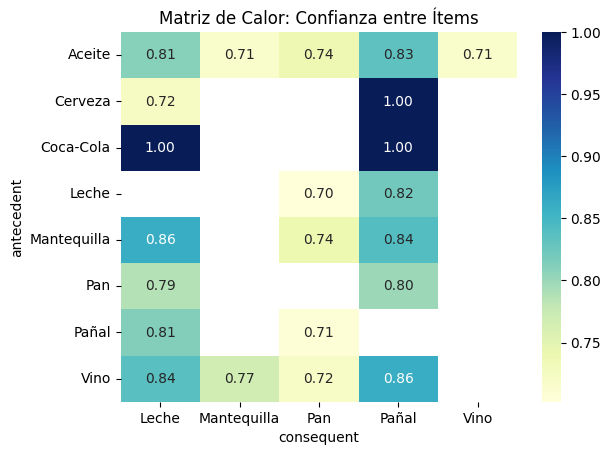

In [ ]:

#Matriz de Calor de Confianza entre Pares
# Crear DataFrame de pares con confianza
pair_rules = reglas[reglas['antecedents'].apply(lambda x: len(x) == 1) &
                   reglas['consequents'].apply(lambda x: len(x) == 1)]

pair_rules['antecedent'] = pair_rules['antecedents'].apply(lambda x: next(iter(x)))
pair_rules['consequent'] = pair_rules['consequents'].apply(lambda x: next(iter(x)))

pivot = pair_rules.pivot(index='antecedent', columns='consequent', values='confidence')
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Matriz de Calor: Confianza entre Ítems")
plt.show()